# TRAIN 01

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv') 
data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [ ]:
#load data yang diperlukan
df = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv', 
                 usecols=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Class/ASD Traits '])
#ubah value target = 0/1
df['Class/ASD Traits '] = df['Class/ASD Traits '].replace({'Yes': 1, 'No': 0})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,0
1,1,1,0,0,0,1,1,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,1
3,1,1,1,1,1,1,1,1,1,1,1
4,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
#split data fitures/target
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
print('fitures :', x)
print('target', y)

fitures : [[0 0 0 ... 1 0 1]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 1 0 1]
 ...
 [1 0 1 ... 1 1 1]
 [1 0 0 ... 1 0 1]
 [1 1 0 ... 1 1 0]]
target [0 1 1 ... 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
#split data train/test
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [ ]:
print('jumlah x_train : ',len(x_train))
print('jumlah x_test : ',len(x_test))
print('jumlah y_train : ',len(y_train))
print('jumlah y_test : ',len(y_test))

jumlah x_train :  843
jumlah x_test :  211
jumlah y_train :  843
jumlah y_test :  211


In [ ]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (843, 10)
x_test :  (211, 10)
y_train :  (843,)
y_test :  (211,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#siapkan arsitektur model
model = Sequential([
    Dense(16, activation='relu', input_dim=10),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 357
Trainable params: 357
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
85/85 [==============================] - 2s 6ms/step - loss: 0.5382 - accuracy: 0.6940 - val_loss: 0.4637 - val_accuracy: 0.6730
Epoch 2/20
85/85 [==============================] - 0s 3ms/step - loss: 0.4144 - accuracy: 0.7023 - val_loss: 0.3892 - val_accuracy: 0.7441
Epoch 3/20
85/85 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.7912 - val_loss: 0.3249 - val_accuracy: 0.8531
Epoch 4/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2949 - accuracy: 0.8624 - val_loss: 0.2638 - val_accuracy: 0.9100
Epoch 5/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9205 - val_loss: 0.2003 - val_accuracy: 0.9621
Epoch 6/20
85/85 [==============================] - 0s 3ms/step - loss: 0.1828 - accuracy: 0.9514 - val_loss: 0.1524 - val_accuracy: 0.9668
Epoch 7/20
85/85 [==============================] - 0s 3ms/step - loss: 0.1403 - accuracy: 0.9632 - val_loss: 0.1109 - val_accuracy: 0.9858
Epoch 8/20
85/85 [==

In [ ]:
#evaluasi performa model
loss, acc = model.evaluate(x_test, y_test)
print('Test accuracy:', acc)

7/7 [==============================] - 0s 4ms/step - loss: 0.0160 - accuracy: 1.0000
Test accuracy: 1.0


In [ ]:
y_pred = model.predict(x_test[:5])
y_pred = (y_pred > 0.5) * 1
y_pred

1/1 [==============================] - 0s 137ms/step


array([[1],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
y_test[:5]

array([1, 0, 0, 1, 1])

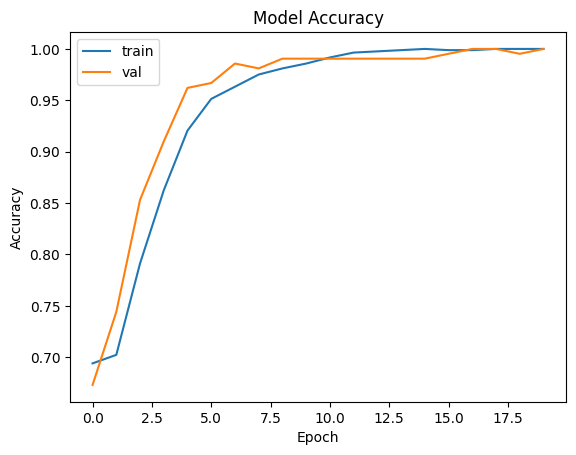

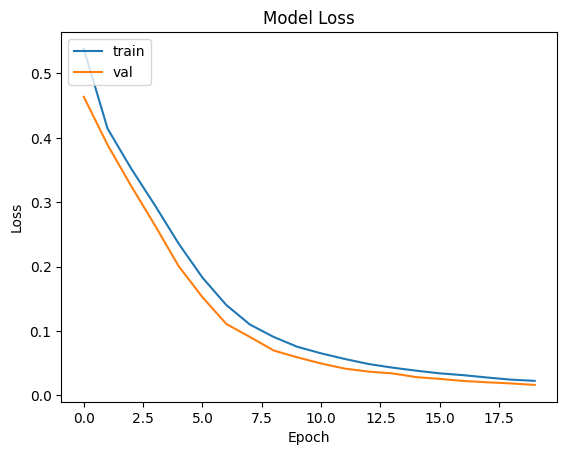

In [ ]:
import matplotlib.pyplot as plt

# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('model_01.h5')

In [ ]:
#convert models > tf lite
import tensorflow as tf
tf.saved_model.save(model,'/content/TFLite/')

In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/TFLite')
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model.tflite')
tflite_model_file.write_bytes(tflite_model)

3488

# Simulasi

In [ ]:
# Daftar pertanyaan
pertanyaan = [
    "Does your child look at you when you call his/her name?",
    "How easy is it for you to get eye contact with your child?",
    "Does your child point to indicate that s/he wants something?",
    "Does your child point to share interest with you?",
    "Does your child pretend?",
    "Does your child follow where you’re looking?",
    "If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them?",
    "Would you describe your child’s first words as: ",
    "Does your child use simple gestures?",
    "Does your child stare at nothing with no apparent purpose?"
]

# Membuat dataframe kosong untuk menyimpan jawaban
data = pd.DataFrame(columns=["Pertanyaan", "Jawaban"])

# Mengisi jawaban untuk setiap pertanyaan
for i, pertanyaan in enumerate(pertanyaan):
    jawaban = input(pertanyaan + " (0/1): ")
    data.loc[i] = [pertanyaan, jawaban]

# Menyimpan jawaban ke file CSV
data.to_csv("jawaban.csv", index=False)

# Menampilkan data yang telah disimpan
print("Data jawaban telah disimpan:")
print(data)

Does your child look at you when you call his/her name? (0/1): 0
How easy is it for you to get eye contact with your child? (0/1): 0
Does your child point to indicate that s/he wants something? (0/1): 1
Does your child point to share interest with you? (0/1): 1
Does your child pretend? (0/1): 0
Does your child follow where you’re looking? (0/1): 0
If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them? (0/1): 0
Would you describe your child’s first words as:  (0/1): 0
Does your child use simple gestures? (0/1): 0
Does your child stare at nothing with no apparent purpose? (0/1): 0
Data jawaban telah disimpan:
                                          Pertanyaan Jawaban
0  Does your child look at you when you call his/...       0
1  How easy is it for you to get eye contact with...       0
2  Does your child point to indicate that s/he wa...       1
3  Does your child point to share interest with you?       1
4                           Do

In [ ]:
# Mengubah kolom Jawaban menjadi array
jawaban = data["Jawaban"].values.astype(int)
jawaban = jawaban.transpose()
jawaban

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from keras.models import load_model
import numpy as np

# Melakukan prediksi menggunakan model
model = load_model("model_01.h5")
X = np.expand_dims(jawaban, axis=0)
prediksi = model.predict(X)

# Menampilkan hasil prediksi
prediksi

1/1 [==============================] - 0s 97ms/step


array([[0.00783026]], dtype=float32)

In [ ]:
["Yes" if prediksi >= 0.5 else "No" for prediksi in prediksi]

['No']

# Test

In [ ]:
import pandas as pd

In [ ]:
# Daftar pertanyaan
pertanyaan = [
    "Does your child look at you when you call his/her name?",
    "How easy is it for you to get eye contact with your child?",
    "Does your child point to indicate that s/he wants something?",
    "Does your child point to share interest with you?",
    "Does your child pretend?",
    "Does your child follow where you’re looking?",
    "If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them?",
    "Would you describe your child’s first words as: ",
    "Does your child use simple gestures?",
    "Does your child stare at nothing with no apparent purpose?"
]

# Membuat dataframe kosong untuk menyimpan jawaban
data = pd.DataFrame(columns=["Pertanyaan", "Jawaban"])

# Mengisi jawaban untuk setiap pertanyaan
for i, pertanyaan in enumerate(pertanyaan):
    jawaban = input(pertanyaan + " (0/1): ")
    data.loc[i] = [pertanyaan, jawaban]

# Menyimpan jawaban ke file CSV
data.to_csv("jawaban.csv", index=False)

# Menampilkan data yang telah disimpan
print("Data jawaban telah disimpan:")
print(data)

Does your child look at you when you call his/her name? (0/1): 1
How easy is it for you to get eye contact with your child? (0/1): 1
Does your child point to indicate that s/he wants something? (0/1): 0
Does your child point to share interest with you? (0/1): 0
Does your child pretend? (0/1): 0
Does your child follow where you’re looking? (0/1): 0
If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them? (0/1): 0
Would you describe your child’s first words as:  (0/1): 0
Does your child use simple gestures? (0/1): 0
Does your child stare at nothing with no apparent purpose? (0/1): 0
Data jawaban telah disimpan:
                                          Pertanyaan Jawaban
0  Does your child look at you when you call his/...       1
1  How easy is it for you to get eye contact with...       1
2  Does your child point to indicate that s/he wa...       0
3  Does your child point to share interest with you?       0
4                           Do

In [ ]:
# Mengubah kolom Jawaban menjadi array
jawaban = data["Jawaban"].values.astype(int)
jawaban = jawaban.transpose()

from keras.models import load_model
import numpy as np

# Melakukan prediksi menggunakan model
model = load_model("model_01.h5")
X = np.expand_dims(jawaban, axis=0)
prediksi = model.predict(X)

# Menampilkan hasil prediksi
print(prediksi)
["Yes" if prediksi >= 0.5 else "No" for prediksi in prediksi]

1/1 [==============================] - 0s 140ms/step
[[0.00386581]]


['No']

# TRAIN 02 (+ fitur 'Sex')

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv') 
data.head(10)

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


In [ ]:
#load data yang diperlukan
df = pd.read_csv('/content/drive/MyDrive/Toddler Autism dataset July 2018.csv', 
                 usecols=['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Sex', 'Class/ASD Traits '])
#ubah value target = 0/1
df['Class/ASD Traits '] = df['Class/ASD Traits '].replace({'Yes': 1, 'No': 0})
df['Sex'] = df['Sex'].replace({'f': 1, 'm': 0})
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Sex,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,1,0
1,1,1,0,0,0,1,1,0,0,0,0,1
2,1,0,0,0,0,0,1,1,0,1,0,1
3,1,1,1,1,1,1,1,1,1,1,0,1
4,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
#split data fitures/target
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [ ]:
print('fitures :', x)
print('target', y)

fitures : [[0 0 0 ... 0 1 1]
 [1 1 0 ... 0 0 0]
 [1 0 0 ... 0 1 0]
 ...
 [1 0 1 ... 1 1 0]
 [1 0 0 ... 0 1 0]
 [1 1 0 ... 1 0 0]]
target [0 1 1 ... 1 0 1]


In [ ]:
from sklearn.model_selection import train_test_split
#split data train/test
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=42)

In [ ]:
print('jumlah x_train : ',len(x_train))
print('jumlah x_test : ',len(x_test))
print('jumlah y_train : ',len(y_train))
print('jumlah y_test : ',len(y_test))

jumlah x_train :  843
jumlah x_test :  211
jumlah y_train :  843
jumlah y_test :  211


In [ ]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (843, 11)
x_test :  (211, 11)
y_train :  (843,)
y_test :  (211,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
#siapkan arsitektur model
model = Sequential([
    Dense(16, activation='relu', input_dim=11),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

#compile
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                192       
                                                                 
 dense_4 (Dense)             (None, 10)                170       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 373
Trainable params: 373
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#train model
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_data=(x_test, y_test))

Epoch 1/20
85/85 [==============================] - 2s 5ms/step - loss: 0.6264 - accuracy: 0.7663 - val_loss: 0.5475 - val_accuracy: 0.8057
Epoch 2/20
85/85 [==============================] - 0s 2ms/step - loss: 0.4415 - accuracy: 0.8043 - val_loss: 0.3454 - val_accuracy: 0.8720
Epoch 3/20
85/85 [==============================] - 0s 3ms/step - loss: 0.2910 - accuracy: 0.8861 - val_loss: 0.2302 - val_accuracy: 0.9005
Epoch 4/20
85/85 [==============================] - 0s 2ms/step - loss: 0.2052 - accuracy: 0.9205 - val_loss: 0.1711 - val_accuracy: 0.9479
Epoch 5/20
85/85 [==============================] - 0s 3ms/step - loss: 0.1583 - accuracy: 0.9442 - val_loss: 0.1343 - val_accuracy: 0.9621
Epoch 6/20
85/85 [==============================] - 0s 3ms/step - loss: 0.1257 - accuracy: 0.9526 - val_loss: 0.1127 - val_accuracy: 0.9621
Epoch 7/20
85/85 [==============================] - 0s 2ms/step - loss: 0.1042 - accuracy: 0.9668 - val_loss: 0.0945 - val_accuracy: 0.9716
Epoch 8/20
85/85 [==

In [ ]:
#evaluasi performa model
loss, acc = model.evaluate(x_test, y_test)
print('Test accuracy:', acc)

7/7 [==============================] - 0s 3ms/step - loss: 0.0272 - accuracy: 0.9905
Test accuracy: 0.9905213117599487


In [ ]:
y_pred = model.predict(x_test[:5])
y_pred = (y_pred > 0.5) * 1
y_pred

1/1 [==============================] - 0s 111ms/step


array([[1],
       [0],
       [0],
       [1],
       [1]])

In [ ]:
y_test[:5]

array([1, 0, 0, 1, 1])

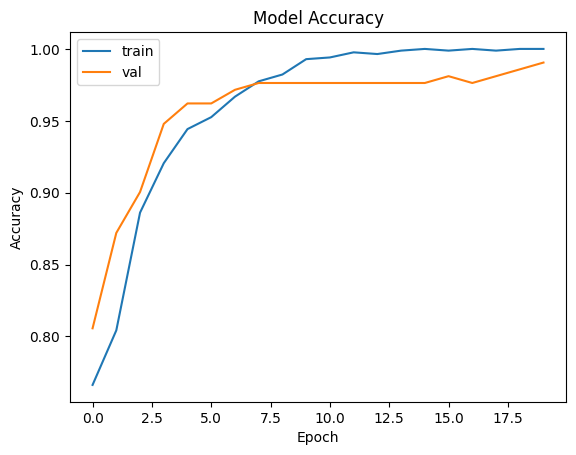

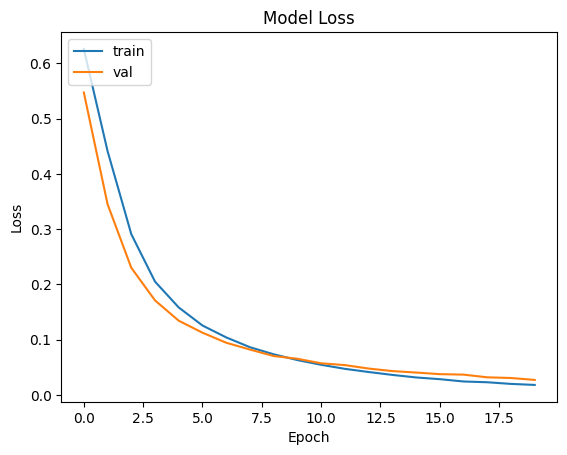

In [ ]:
import matplotlib.pyplot as plt

# plot accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# plot loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.save('model_02.h5')

In [ ]:
#convert models > tf lite
import tensorflow as tf
tf.saved_model.save(model,'/content/TFLite/')

In [ ]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model('/content/TFLite')
tflite_model = converter.convert()
tflite_model_file = pathlib.Path('model_02.tflite')
tflite_model_file.write_bytes(tflite_model)

3584

# Test 02

In [ ]:
import pandas as pd

In [38]:
# Daftar pertanyaan
pertanyaan = [
    "Does your child look at you when you call his/her name?",
    "How easy is it for you to get eye contact with your child?",
    "Does your child point to indicate that s/he wants something?",
    "Does your child point to share interest with you?",
    "Does your child pretend?",
    "Does your child follow where you’re looking?",
    "If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them?",
    "Would you describe your child’s first words as: ",
    "Does your child use simple gestures?",
    "Does your child stare at nothing with no apparent purpose?",
    "Male: 0 or Female:1?"
]

# Membuat dataframe kosong untuk menyimpan jawaban
data = pd.DataFrame(columns=["Pertanyaan", "Jawaban"])

# Mengisi jawaban untuk setiap pertanyaan
for i, pertanyaan in enumerate(pertanyaan):
    jawaban = input(pertanyaan + " (0/1): ")
    data.loc[i] = [pertanyaan, jawaban]

# Menyimpan jawaban ke file CSV
data.to_csv("jawaban.csv", index=False)

# Menampilkan data yang telah disimpan
print("Data jawaban telah disimpan:")
print(data)

Does your child look at you when you call his/her name? (0/1): 1
How easy is it for you to get eye contact with your child? (0/1): 1
Does your child point to indicate that s/he wants something? (0/1): 1
Does your child point to share interest with you? (0/1): 1
Does your child pretend? (0/1): 1
Does your child follow where you’re looking? (0/1): 0
If you or someone else in the family is visibly upset, does your child show signs of wanna comfort them? (0/1): 0
Would you describe your child’s first words as:  (0/1): 0
Does your child use simple gestures? (0/1): 0
Does your child stare at nothing with no apparent purpose? (0/1): 0
Male: 0 or Female:1? (0/1): 1
Data jawaban telah disimpan:
                                           Pertanyaan Jawaban
0   Does your child look at you when you call his/...       1
1   How easy is it for you to get eye contact with...       1
2   Does your child point to indicate that s/he wa...       1
3   Does your child point to share interest with you?    

In [39]:
1# Mengubah kolom Jawaban menjadi array
jawaban = data["Jawaban"].values.astype(int)
jawaban = jawaban.transpose()

from keras.models import load_model
import numpy as np

# Melakukan prediksi menggunakan model
model = load_model("model_02.h5")
X = np.expand_dims(jawaban, axis=0)
prediksi = model.predict(X)

# Menampilkan hasil prediksi
print(prediksi)
["Yes" if prediksi >= 0.5 else "No" for prediksi in prediksi]

1/1 [==============================] - 0s 59ms/step
[[0.9905636]]


['Yes']

**Ekperimen** model_02 dengan fitur 10 Q-Chat + Sex

*   input 11000000000 > output [[0.00321399]], ['No']
*   input 11000000001 > output [[0.00058287]], ['No']
*   input 11100000000 > output [[0.02625393]], ['No']
*   input 11100000001 > output [[0.02882831]], ['No']
*   input 11110000000 > output [[0.8542407]], ['Yes']
*   input 11110000001 > output [[0.7015571]], ['Yes']
*   input 11111000000 > output [[0.9947954]], ['Yes']
*   input 11111000001 > output [[0.9905636]], ['Yes']
 
**Kesimpulan**:
fitur tambahan hanya mempengaruhi sedikit nilai akurasi tetapi tidak sampai merubah status traits